## 0. Install and Import Dependencies

In [1]:
!pip install torch torchvision torchaudio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 10.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 22.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 33.1 MB/s eta 0:00:0000:0100:01


In [2]:
!pip install easyocr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 49.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.1/108.1 kB 24.2 MB/s eta 0:00:00


In [4]:
import easyocr
import cv2
from matplotlib import pyplot as plt
import numpy as np

/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [6]:
%cd /home/studio-lab-user/DS-Projects/OCR/OCR_image_test

/home/studio-lab-user/DS-Projects/OCR/OCR_image_test


## 1. Read in images or video

In [15]:
IMAGE_PATH = '/home/studio-lab-user/DS-Projects/OCR/OCR_image_test/among (113).jpg'

In [16]:
reader = easyocr.Reader(['en'], gpu=False)
result = reader.readtext(IMAGE_PATH)
result

Using CPU. Note: This module is much faster with a GPU.


[([[276, 453], [496, 453], [496, 558], [276, 558]],
  'LuoNg)',
  0.194813478269001),
 ([[106, 532], [158, 532], [158, 608], [106, 608]], '3', 0.8567489175881207),
 ([[644, 534], [692, 534], [692, 608], [644, 608]], 'G', 0.12355210652737014),
 ([[132.5795293350179, 339.0110573653399],
   [192.5443116577906, 348.8279811160002],
   [161.4204706649821, 544.9889426346601],
   [100.4556883422094, 535.1720188839998]],
  '1',
  0.29255526295406753),
 ([[608.5329616629347, 351.013644436183],
   [665.9564412105541, 341.0573795123553],
   [697.4670383370653, 537.986355563817],
   [641.0435587894459, 547.9426204876447]],
  'J',
  0.8284413624102491)]

In [24]:
print(result[0][1])
print(result[1][1])

LuoNg)
3


## 2. Draw Results

In [17]:
top_left = tuple(result[0][0][0])
bottom_right = tuple(result[0][0][2])
text = result[0][1]
font = cv2.FONT_HERSHEY_SIMPLEX

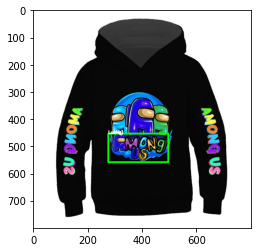

In [20]:
img = cv2.imread(IMAGE_PATH)
img = cv2.rectangle(img, top_left, bottom_right, (0,255,0), 5)
img = cv2.putText(img, text, top_left, font, .5, (255,255,255),2, cv2.LINE_AA)
plt.imshow(img)
plt.show()

## 3. Handling Multiple Lines

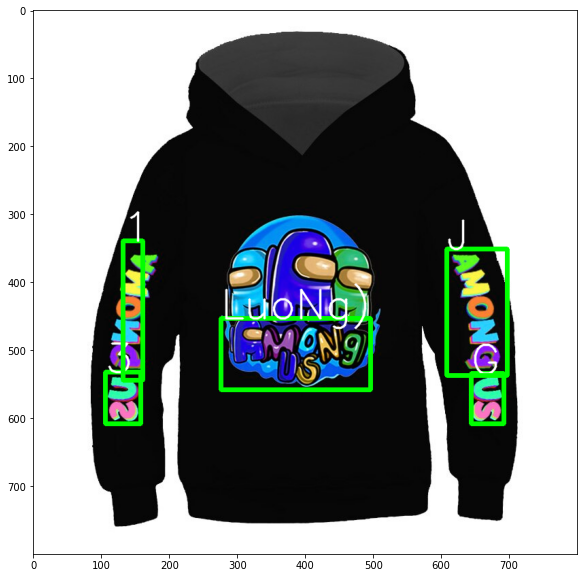

In [26]:
img = cv2.imread(IMAGE_PATH)
for detection in result:
    top_left = tuple([int(val) for val in detection[0][0]])
    bottom_right = tuple([int(val) for val in detection[0][2]])
    text = detection[1]
    font = cv2.FONT_HERSHEY_SIMPLEX
    img = cv2.rectangle(img, top_left, bottom_right, (0,255,0), 5)
    img = cv2.putText(img, text, top_left, font, 2, (255,255,255), 2, cv2.LINE_AA)
    
plt.figure(figsize=(10,10))
plt.imshow(img)
plt.show()